PROYECTO AMAZON


In [ ]:
# https://www.kaggle.com/datasets/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones?resource=download

Crear el Path

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path=r"/content/drive/MyDrive/Proyecto Programación"
Base=pd.read_csv(filepath_or_buffer=r"/content/drive/MyDrive/Proyecto Programación/Datos/Amazon_Unlocked_Mobile.csv",
                     encoding="latin-1",
                     sep=","
            )

In [ ]:
Base

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


Ordenar la base por nombre de marca


In [ ]:
Base_Ordenada = Base.sort_values(by='Brand Name', ascending=True)
Base_Ordenada

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
1579,"AKUA AKUMOBEK40W01 4.0"" EK4 Smartphone - GSM U...",AKUA,NaN,5,This phone seems pretty excellent for the mone...,0.0
1578,"AKUA AKUMOBEK40W01 4.0"" EK4 Smartphone - GSM U...",AKUA,NaN,5,I love this phone. I like it better than my ol...,0.0
1577,"AKUA AKUMOBEK40W01 4.0"" EK4 Smartphone - GSM U...",AKUA,NaN,5,This phone seems pretty excellent for the mone...,0.0
1576,"AKUA AKUMOBEK40W01 4.0"" EK4 Smartphone - GSM U...",AKUA,NaN,5,I love this phone. I like it better than my ol...,0.0
301363,Premium (2-Pack) Bluetooth Selfie Stick & Wire...,AMM Global Enterprises,29.99,5,"We received the two selfie sticks (one wired, ...",0.0
...,...,...,...,...,...,...
413097,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,NaN,167.22,5,EXCELENTE,0.0
413098,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,NaN,167.22,2,Not as expected so I returned this phone,0.0
413099,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,NaN,167.22,5,very well,0.0
413100,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,NaN,167.22,5,excelente,0.0


**Descripción de la Base**

In [ ]:
Base_Ordenada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413840 entries, 1579 to 413101
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 22.1+ MB


In [ ]:
Base_Ordenada.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


Limpieza de la Base

In [ ]:
Base2=Base_Ordenada[Base_Ordenada.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
Base_NoNan = Base2.dropna(subset=['Rating', 'Review Votes'])
Base_NoNan

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
301363,Premium (2-Pack) Bluetooth Selfie Stick & Wire...,AMM Global Enterprises,29.99,5,"We received the two selfie sticks (one wired, ...",0.0
301364,Premium (2-Pack) Bluetooth Selfie Stick & Wire...,AMM Global Enterprises,29.99,5,really nice selfie sticks. price perfect,0.0
301365,Premium (2-Pack) Bluetooth Selfie Stick & Wire...,AMM Global Enterprises,29.99,5,I sent it as a birthday gift for a friend! She...,0.0
301366,Premium (2-Pack) Bluetooth Selfie Stick & Wire...,AMM Global Enterprises,29.99,5,I really love these Premium Selfie Sticks .......,0.0
301367,Premium (2-Pack) Bluetooth Selfie Stick & Wire...,AMM Global Enterprises,29.99,4,"Very nice packaging, thick sturdy handle, easy...",1.0
...,...,...,...,...,...,...
204155,Huhushop(TM) Mini Ultra Slim Credit Bank Card ...,winwinzonece,26.99,3,Very compact and unobstrusive.Very basic funct...,6.0
204154,Huhushop(TM) Mini Ultra Slim Credit Bank Card ...,winwinzonece,26.99,5,it's very nice and good,0.0
83313,Big Button Senior Cell-Phone Unlocked Dual-Sim...,worryfree,19.44,1,"It's awful, cannot here anyone on other end of...",0.0
83314,Big Button Senior Cell-Phone Unlocked Dual-Sim...,worryfree,19.44,3,It's a good phone but haven't been able to fig...,0.0


In [ ]:
Base_Texto = Base_NoNan[Base_NoNan['Reviews'].notnull()]
Base_Texto = Base_Texto[Base_Texto['Reviews'].str.strip() != '']
Base_Texto

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
301363,Premium (2-Pack) Bluetooth Selfie Stick & Wire...,AMM Global Enterprises,29.99,5,"We received the two selfie sticks (one wired, ...",0.0
301364,Premium (2-Pack) Bluetooth Selfie Stick & Wire...,AMM Global Enterprises,29.99,5,really nice selfie sticks. price perfect,0.0
301365,Premium (2-Pack) Bluetooth Selfie Stick & Wire...,AMM Global Enterprises,29.99,5,I sent it as a birthday gift for a friend! She...,0.0
301366,Premium (2-Pack) Bluetooth Selfie Stick & Wire...,AMM Global Enterprises,29.99,5,I really love these Premium Selfie Sticks .......,0.0
301367,Premium (2-Pack) Bluetooth Selfie Stick & Wire...,AMM Global Enterprises,29.99,4,"Very nice packaging, thick sturdy handle, easy...",1.0
...,...,...,...,...,...,...
204155,Huhushop(TM) Mini Ultra Slim Credit Bank Card ...,winwinzonece,26.99,3,Very compact and unobstrusive.Very basic funct...,6.0
204154,Huhushop(TM) Mini Ultra Slim Credit Bank Card ...,winwinzonece,26.99,5,it's very nice and good,0.0
83313,Big Button Senior Cell-Phone Unlocked Dual-Sim...,worryfree,19.44,1,"It's awful, cannot here anyone on other end of...",0.0
83314,Big Button Senior Cell-Phone Unlocked Dual-Sim...,worryfree,19.44,3,It's a good phone but haven't been able to fig...,0.0


In [ ]:
Base_Texto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334328 entries, 301363 to 83315
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  334328 non-null  object 
 1   Brand Name    334328 non-null  object 
 2   Price         334328 non-null  float64
 3   Rating        334328 non-null  int64  
 4   Reviews       334328 non-null  object 
 5   Review Votes  334328 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 17.9+ MB


In [ ]:
Base_Texto.describe()

,Price,Rating,Review Votes
count,334328.000000,334328.000000,334328.000000
mean,222.585113,3.824888,1.474546
std,283.141417,1.541197,9.217442
min,1.730000,1.000000,0.000000
25%,75.410000,3.000000,0.000000
50%,139.000000,5.000000,0.000000
75%,264.100000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [ ]:
# Pasar todo a minúsculas
Base_Texto['Brand Name'] = Base_Texto['Brand Name'].str.lower().str.strip()

# Diccionario de agrupación de marcas
reemplazos_marca = {
    'samsung electronics': 'samsung',
    'samsung mobile': 'samsung',
    'samsung': 'samsung',

    'lg electronics': 'lg',
    'lg': 'lg',

    'sony mobile': 'sony',
    'sony ericsson': 'sony',
    'sony corporation': 'sony',
    'sony': 'sony',

    'htc corporation': 'htc',
    'htc': 'htc',

    'motorola mobility': 'motorola',
    'motorola': 'motorola',

    'apple inc.': 'apple',
    'apple': 'apple',

    'blackberry': 'blackberry',
    'nokia': 'nokia',
    'zte': 'zte',
    'huawei': 'huawei',
    'asus': 'asus',
    'polaroid': 'polaroid',
    'alcatel': 'alcatel',
    'verykool': 'verykool',
    'cnpgd': 'cnpgd',
    'posh mobile': 'posh mobile',
    'otterbox': 'otterbox',
    'blu': 'blu'
}

# Reemplazar
Base_Texto['Brand Name'] = Base_Texto['Brand Name'].replace(reemplazos_marca)

In [ ]:
# Ver Marcas
print(Base_Texto['Brand Name'].nunique())
print(Base_Texto['Brand Name'].value_counts().head(20))

378
Brand Name
Samsung           63035
BLU               59168
Apple             56101
LG                21636
BlackBerry        16504
Nokia             16166
Motorola          13000
HTC               12341
CNPGD             12302
OtterBox           7880
Sony               7591
Posh Mobile        6516
Huawei             3146
LG Electronics     3043
samsung            2343
ZTE                1617
Polaroid           1609
Alcatel            1380
Asus               1288
verykool           1111
Name: count, dtype: int64


**Análisis de Sentimiento**

In [ ]:
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob
# Aplicación el Análisis de Sentimiento a Cada Reseña
Base_Texto['Sentiment_Score'] = Base_Texto['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

Gráfico de Sentimiento Según Rating

In [ ]:
# Correlación entre el Rating y el Sentimiento
Correlacion = Base_Texto[['Sentiment_Score', 'Rating']].corr()
print(Correlacion)

                 Sentiment_Score    Rating
Sentiment_Score         1.000000  0.553845
Rating                  0.553845  1.000000


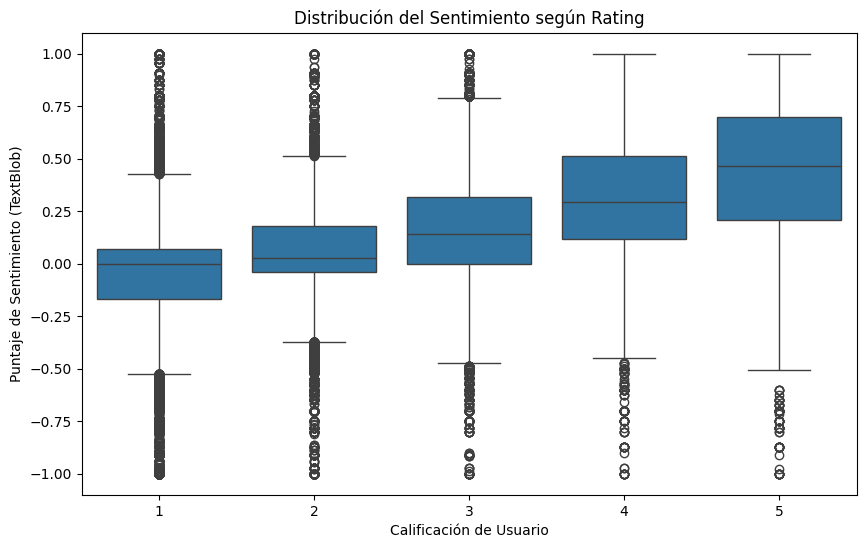

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Sentiment_Score', data=Base_Texto)
plt.title('Distribución del Sentimiento según Rating')
plt.ylabel('Puntaje de Sentimiento (TextBlob)')
plt.xlabel('Calificación de Usuario')
plt.show()

Gráficos de distribución de Rating y Sentimiento

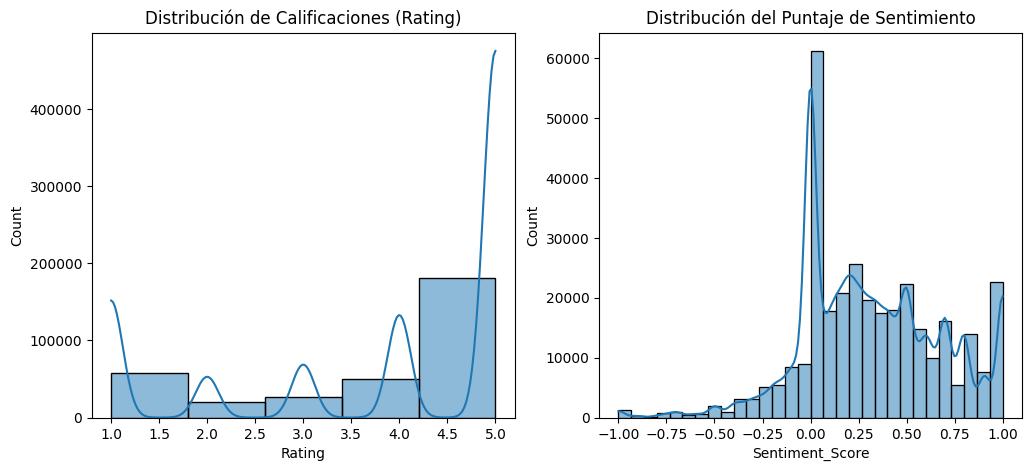

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Histograma Rating
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(Base_Texto['Rating'], bins=5, kde=True)
plt.title("Distribución de Calificaciones (Rating)")
#Histograma Sentimiento
plt.subplot(1,2,2)
sns.histplot(Base_Texto['Sentiment_Score'], bins=30, kde=True)
plt.title("Distribución del Puntaje de Sentimiento")
plt.show()

Gráficas Adicionales

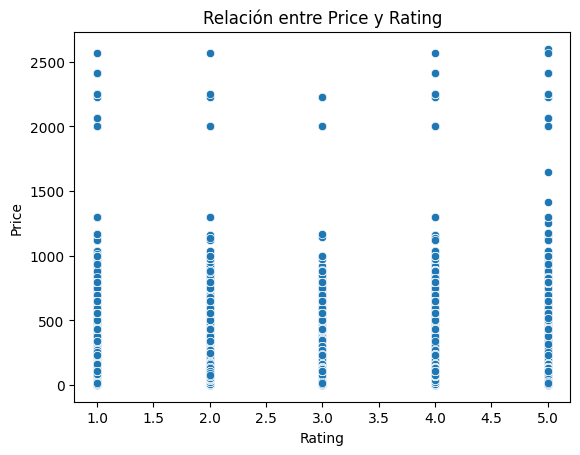

In [ ]:
#Relación Entre Precio y Rating
sns.scatterplot(x='Rating', y='Price', data=Base_Texto)
plt.title('Relación entre Price y Rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

## Estimaciones

Regresiones

In [ ]:
import statsmodels.api as sm
# Regresión simple
X_simple = sm.add_constant(Base_Texto["Rating"])
y_simple = Base_Texto["Price"]
reg_simple = sm.OLS(endog=y_simple, exog=X_simple).fit()
print("Regresión Simple (Price ~ Rating):")
print(reg_simple.summary())

Regresión Simple (Price ~ Rating):
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1838.
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        00:05:57   Log-Likelihood:            -2.3611e+06
No. Observations:              334328   AIC:                         4.722e+06
Df Residuals:                  334326   BIC:                         4.722e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        170.

In [ ]:
# Regresión Multivariable
X_multi = sm.add_constant(Base_Texto[["Rating", "Review Votes", 'Sentiment_Score']])
y_multi = Base_Texto["Price"]
reg_multi = sm.OLS(endog=y_multi, exog=X_multi).fit()
print("\nRegresión Multivariable (Price ~ Rating + Review Votes):")
print(reg_multi.summary())


Regresión Multivariable (Price ~ Rating + Review Votes):
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     806.8
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        03:23:29   Log-Likelihood:            -2.3608e+06
No. Observations:              334328   AIC:                         4.722e+06
Df Residuals:                  334324   BIC:                         4.722e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [ ]:
# Creando la Interacción
Base_Texto["Rating_Review"] = Base_Texto["Rating"] * Base_Texto["Review Votes"]
X_interaction = sm.add_constant(Base_Texto[["Rating", "Review Votes", "Rating_Review", 'Sentiment_Score']])
y_interaction = Base_Texto["Price"]
reg_interaction = sm.OLS(endog=y_interaction, exog=X_interaction).fit()
print("\nRegresión con Interacción (Price ~ Rating + Review Votes + Rating_Review):")
print(reg_interaction.summary())


Regresión con Interacción (Price ~ Rating + Review Votes + Rating_Review):
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     663.9
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        03:25:34   Log-Likelihood:            -2.3607e+06
No. Observations:              334328   AIC:                         4.721e+06
Df Residuals:                  334323   BIC:                         4.721e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

Precio como variable independiente y variables explicativas (Rating, Review y Sentimiento)

In [ ]:
#Ver si el sentimiento, los votos y el rating predicen precio.
import statsmodels.api as sm

# Variables explicativas
X = Base_Texto[['Sentiment_Score', 'Review Votes','Rating']]
X = sm.add_constant(X)

# Variable objetivo
y = Base_Texto['Price']

# Modelo de regresión
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     806.8
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        04:24:42   Log-Likelihood:            -2.3608e+06
No. Observations:              334328   AIC:                         4.722e+06
Df Residuals:                  334324   BIC:                         4.722e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             174.4883      1.349    1

Matriz Confusión


In [ ]:
#Regresión Logística
# Crear variable binaria: 1 si Rating >= 4, 0 en otro caso
Base_Texto['High_Rating'] = (Base_Texto['Rating'] >= 4).astype(int)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = Base_Texto[['Sentiment_Score', 'Review Votes']]
y = Base_Texto['High_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.59      0.61     31164
           1       0.82      0.84      0.83     69135

    accuracy                           0.76    100299
   macro avg       0.72      0.71      0.72    100299
weighted avg       0.76      0.76      0.76    100299



MCO



In [ ]:
#Predecir Rating con Variables Numéricas
X = Base_Texto[['Sentiment_Score', 'Price', 'Review Votes']]
X = sm.add_constant(X)
y = Base_Texto['Rating']

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                 4.969e+04
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        00:06:47   Log-Likelihood:            -5.5737e+05
No. Observations:              334328   AIC:                         1.115e+06
Df Residuals:                  334324   BIC:                         1.115e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.0734      0.003    9

Regresión incluyendo Marcas e interacciones

In [ ]:
#Regresión
import statsmodels.api as sm
import pandas as pd

# Filtro de marcas más frecuentes
top_marcas = Base_Texto['Brand Name'].value_counts().nlargest(10).index
Base_Modelo = Base_Texto[Base_Texto['Brand Name'].isin(top_marcas)].copy()

# Eliminar filas con valores nulos en columnas clave
Base_Modelo = Base_Modelo.dropna(subset=['Review Votes', 'Sentiment_Score', 'Rating'])

# Convertimos 'Review Votes' y 'Rating' a float si no lo están
Base_Modelo['Review Votes'] = pd.to_numeric(Base_Modelo['Review Votes'], errors='coerce')
Base_Modelo['Rating'] = pd.to_numeric(Base_Modelo['Rating'], errors='coerce')
Base_Modelo['Sentiment_Score'] = pd.to_numeric(Base_Modelo['Sentiment_Score'], errors='coerce')

# Crear variables dummy para las marcas
dummies_marcas = pd.get_dummies(Base_Modelo['Brand Name'], prefix='brand', drop_first=True)

# Combinar todo
X = pd.concat([Base_Modelo[['Review Votes', 'Sentiment_Score', 'Rating']], dummies_marcas], axis=1)
y = Base_Modelo['Rating']

# Convertir todo a tipo float (¡clave!)
X = X.astype(float)
y = y.astype(float)

# Agregar constante
X = sm.add_constant(X)

# Ajustar modelo
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.037e+32
Date:                Tue, 13 May 2025   Prob (F-statistic):               0.00
Time:                        21:31:34   Log-Likelihood:             8.5541e+06
No. Observations:              285417   AIC:                        -1.711e+07
Df Residuals:                  285404   BIC:                        -1.711e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.525e-14   1.52e-16  

**Red Neuronal**

In [ ]:
#Regresión
Base_Texto["Rating_Review"]= Base_Texto["Rating"]*Base_Texto["Review Votes"]
reg_OLS =sm.OLS(endog = Base_Texto["Price"], exog = Base_Texto[["Rating", "Review Votes", "Rating_Review"]]).fit()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
X = Base_Texto[["Rating", "Review Votes"]]
Y = Base_Texto["Price"]
clf = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)
clf2 = clf.fit(X, Y)
y_hat=clf.predict(Base_Texto[["Rating", "Review Votes"]])

In [ ]:
clf.feature_importances_

array([0.6162895, 0.3837105])

In [ ]:
from sklearn.metrics import  r2_score

In [ ]:
R2= r2_score(Base_NoNan["Price"], y_hat)
R2

0.01522462890637033

In [ ]:
Predicted=pd.Series(clf.predict(Base_Texto[["Rating", "Review Votes"]]))
Base_Texto["Predicted"]=Predicted

Red

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import pandas as pd

# Datos para la red neuronal
X_train = Base_Texto[["Rating", "Review Votes", "Sentiment_Score"]]
y_train = Base_Texto["Price"]

# Probar diferentes valores de alpha para la regularización
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1]

for alpha in alpha_values:
    # Definir el modelo con el valor actual de alpha
    neural_net = MLPRegressor(hidden_layer_sizes=(200, 50, 20),
                              activation='relu',
                              solver='adam',
                              alpha=alpha,
                              batch_size=32,
                              learning_rate='adaptive',
                              learning_rate_init=0.001,
                              max_iter=150,
                              random_state=0,
                              verbose=False)

    # Entrenar el modelo
    neural_net.fit(X_train, y_train)

    # Predecir en el conjunto completo
    y_pred = neural_net.predict(Base_Texto[["Rating", "Review Votes", "Sentiment_Score"]])

    # Calcular el R^2 en el conjunto completo
    R2 = r2_score(Base_Texto["Price"], y_pred)
    print(f'Alpha: {alpha}')
    print(f'R^2 en conjunto completo: {R2:.4f}\n')
    print(f'R^2 en entrenamiento: {r2_train:.4f}')
    print(f'R^2 en prueba: {r2_test:.4f}\n')

# Agregando las predicciones a la base original
Base_Texto["Predicted_NN"] = neural_net.predict(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

Otra Red

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# Datos para la red neuronal
X_train = Base_Texto[["Rating", "Review Votes", 'Sentiment_Score']]
y_train = Base_Texto["Price"]
X_test = X_train  # Usando los mismos datos para simplificar

develop = MLPRegressor(hidden_layer_sizes=(200,200), activation='relu', solver='adam', alpha=0.1, batch_size=32, learning_rate='adaptive', learning_rate_init=0.001, verbose=True)
develop.fit(X_train, y_train)

develop.predict(X_train)

# Probar diferentes valores de alpha para la regularización
alpha_values = [0.001, 0.01, 0.1, 1]

for alpha in alpha_values:
    # Definir el modelo con el valor actual de alpha
    neural_net = MLPRegressor(hidden_layer_sizes=(200, 50, 20),
                              activation='relu',
                              solver='adam',
                              alpha=alpha,
                              batch_size=32,
                              learning_rate='adaptive',
                              learning_rate_init=0.001,
                              max_iter=100,
                              random_state=0,
                              verbose=False)

    # Entrenar el modelo
    neural_net.fit(X_train, y_train)

    # Predecir en los conjuntos de entrenamiento y prueba
    y_train_pred = neural_net.predict(X_train)
    y_test_pred = neural_net.predict(X_test)

    # Calcular el R^2 para ambos conjuntos
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_train, y_test_pred)  # Usando mismos datos para prueba

    print(f'Alpha: {alpha}')
    print(f'R^2 en entrenamiento: {r2_train:.4f}')
    print(f'R^2 en prueba: {r2_test:.4f}\n')

Iteration 1, loss = 40040.90135299
Iteration 2, loss = 39684.31505861
Iteration 3, loss = 39663.02801860
Iteration 4, loss = 39650.02544949
Iteration 5, loss = 39643.96213681
Iteration 6, loss = 39631.96677102
Iteration 7, loss = 39626.36116745
Iteration 8, loss = 39619.74612800
Iteration 9, loss = 39615.27794253
Iteration 10, loss = 39603.76880963
Iteration 11, loss = 39604.45172265
Iteration 12, loss = 39601.26985933
Iteration 13, loss = 39595.91981961
Iteration 14, loss = 39589.49488666
Iteration 15, loss = 39593.99164663
Iteration 16, loss = 39587.36072993
Iteration 17, loss = 39588.27228474
Iteration 18, loss = 39587.79737694
Iteration 19, loss = 39585.96863428
Iteration 20, loss = 39587.46919833
Iteration 21, loss = 39579.63670445
Iteration 22, loss = 39579.16593657
Iteration 23, loss = 39579.45389939
Iteration 24, loss = 39578.26189818
Iteration 25, loss = 39577.89071312
Iteration 26, loss = 39575.00479974
Iteration 27, loss = 39575.96950816
Iteration 28, loss = 39577.66765550
I

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

**Modelo de Huggin Face**

In [ ]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 846.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
# 1. Instalar dependencias (en tu terminal o en notebook con "!"):
!pip install sentence-transformers scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
# 2. Importar las Librerías
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 3. Cargar y Dropear NAs
df = Base_Texto.copy()
df = df.dropna(subset=['Reviews', 'Rating', 'Review Votes', 'Price'])

In [ ]:
# 4. Convertir los Datos a Numéricos
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Review Votes'] = pd.to_numeric(df['Review Votes'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna(subset=['Rating', 'Review Votes', 'Price'])

In [ ]:
# 5. Cargar el Modelo de Embeddings
model = SentenceTransformer("tomaarsen/static-similarity-mrl-multilingual-v1")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/214 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/149k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/2.56M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/434M [00:00<?, ?B/s]

In [ ]:
# 6. Generar Embeddings para Todas las Reseñas (Tardará un Poco)
reviews = df['Reviews'].tolist()
embeddings = model.encode(reviews, show_progress_bar=True)  # devuelve arreglo (n_samples, emb_dim)

Batches:   0%|          | 0/10448 [00:00<?, ?it/s]

In [ ]:
# 7. Construir la Matriz de Características X (Combina Embeddings + Otras Variables Numéricas)
X_emb = embeddings  # shape = (n_samples, emb_dim)
X_num = df[['Review Votes', 'Price']].values  # shape = (n_samples, 2)

In [ ]:
# 8. Concatenar Horizontalmente
X = np.hstack([X_emb, X_num])

In [ ]:
# 9. Variable Test y Train
y = df['Rating'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# 10. Definir y Entrenar el MLPRegressor
neuralmodel = MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    alpha=1e-4,
    batch_size='auto',
    learning_rate='constant',
    max_iter=200,
    verbose=True,
    random_state=42
)
neuralmodel.fit(X_train, y_train)

Iteration 1, loss = 1.60592907
Iteration 2, loss = 0.70383731
Iteration 3, loss = 0.51061436
Iteration 4, loss = 0.45747668
Iteration 5, loss = 0.42115555
Iteration 6, loss = 0.38959460
Iteration 7, loss = 0.37010157
Iteration 8, loss = 0.35720765
Iteration 9, loss = 0.35122275
Iteration 10, loss = 0.34510738
Iteration 11, loss = 0.33510578
Iteration 12, loss = 0.32460425
Iteration 13, loss = 0.32557120
Iteration 14, loss = 0.32241950
Iteration 15, loss = 0.30694829
Iteration 16, loss = 0.30955263
Iteration 17, loss = 0.30305305
Iteration 18, loss = 0.30721633
Iteration 19, loss = 0.30625755
Iteration 20, loss = 0.29721917
Iteration 21, loss = 0.29371218
Iteration 22, loss = 0.28383387
Iteration 23, loss = 0.28858790
Iteration 24, loss = 0.28313563
Iteration 25, loss = 0.28662447
Iteration 26, loss = 0.28494605
Iteration 27, loss = 0.28142972
Iteration 28, loss = 0.27437414
Iteration 29, loss = 0.27535355
Iteration 30, loss = 0.27956461
Iteration 31, loss = 0.29044341
Iteration 32, los

MLPRegressor(random_state=42, verbose=True)

In [ ]:
# 11. Evaluar el Modelo
y_pred = neuralmodel.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 0.649893163186151
R²: 0.7267189969276149


In [ ]:
# 12. Hacer Predicciones Individuales
def predict_rating(text_review, review_votes, price):
    emb = model.encode([text_review])
    X_in = np.hstack([emb, [[review_votes, price]]])
    return neuralmodel.predict(X_in)[0]

In [ ]:
# Ejemplo
sample_text = "Muy buen teléfono, funciona rápido y la batería dura todo el día"
print("Predicción de Rating:", predict_rating(sample_text, review_votes=12, price=199.99))

Predicción de Rating: 4.534179349715638


In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/Proyecto Programación/Módulos/Rating_Prect.pkl','wb') as data:
      pickle.dump(neuralmodel, data)

In [ ]:
with open('/content/drive/MyDrive/Proyecto Programación/Módulos/Rating_Prect.pkl', 'rb') as f:

    Rating_Hugging_Face = pickle.load(f)
    print(Rating_Hugging_Face)

MLPRegressor(random_state=42, verbose=True)


In [ ]:
Rating_Hugging_Face.predict(X_train)

array([4.4287688 , 4.55799764, 3.59128118, ..., 4.8301339 , 4.93645312,
       5.01538934])

Predecir el Precio (Falla)

In [ ]:
# 1. Instalar dependencias (en tu terminal o en notebook con "!"):
!pip install sentence-transformers scikit-learn

In [ ]:
# 2. Importar librerías
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 3. Cargar la Base y Dropear NA
df = Base_Texto.copy()
df = df.dropna(subset=['Reviews', 'Rating', 'Review Votes', 'Price', 'Sentiment_Score'])

In [ ]:
# 4. Convertir los Datos a Datos Numéricos
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Review Votes'] = pd.to_numeric(df['Review Votes'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Sentiment_Score'] = pd.to_numeric(df['Sentiment_Score'], errors='coerce')
df = df.dropna(subset=['Rating', 'Review Votes', 'Price', 'Sentiment_Score'])

In [ ]:
# 5. Cargar el Modelo de Embeddings
model = SentenceTransformer("tomaarsen/static-similarity-mrl-multilingual-v1")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/214 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/149k [00:00<?, ?B/s]

0_StaticEmbedding/model.safetensors:   0%|          | 0.00/434M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.56M [00:00<?, ?B/s]

In [ ]:
# 6. Generar Embeddings para Todas las Reseñas (Tardará un Poco)
reviews = df['Reviews'].tolist()
embeddings = model.encode(reviews, show_progress_bar=True)  # devuelve arreglo (n_samples, emb_dim)

Batches:   0%|          | 0/10448 [00:00<?, ?it/s]

In [ ]:
# 7. Construir la Matriz de Características X (Combina Embeddings + Otras Variables Numéricas)
X_emb = embeddings  # shape = (n_samples, emb_dim)
X_num = df[['Review Votes', 'Rating','Sentiment_Score']].values  # shape = (n_samples, 2)

In [ ]:
# 8. Concatenar horizontalmente
X = np.hstack([X_emb, X_num])

In [ ]:
# 9. Variable Test y Train
y = df['Price'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# 10. Definir y Entrenar el MLPRegressor
neuralmodel = MLPRegressor(
    hidden_layer_sizes=(200,50,20),
    activation='relu',
    solver='adam',
    alpha=1e-4,
    batch_size='auto',
    learning_rate='adaptive',
    max_iter=200,
    verbose=True,
    random_state=42
)
neuralmodel.fit(X_train, y_train)

Iteration 1, loss = 40010.59169970
Iteration 2, loss = 38080.45444760
Iteration 3, loss = 36770.52671318
Iteration 4, loss = 35603.05165609
Iteration 5, loss = 34578.71532029
Iteration 6, loss = 33735.84171602
Iteration 7, loss = 32963.17942610
Iteration 8, loss = 32359.58500759
Iteration 9, loss = 31735.25692982
Iteration 10, loss = 31260.36328569
Iteration 11, loss = 30817.65544075
Iteration 12, loss = 30335.54761446
Iteration 13, loss = 29987.44710919
Iteration 14, loss = 29634.22576717
Iteration 15, loss = 29334.23534883
Iteration 16, loss = 29020.28907488
Iteration 17, loss = 28793.39470913
Iteration 18, loss = 28519.38594706
Iteration 19, loss = 28282.43581295
Iteration 20, loss = 28080.11729863
Iteration 21, loss = 27797.71284216
Iteration 22, loss = 27705.04661951
Iteration 23, loss = 27507.15332259
Iteration 24, loss = 27379.24647043
Iteration 25, loss = 27217.81831827
Iteration 26, loss = 27019.58170435
Iteration 27, loss = 26891.19213182
Iteration 28, loss = 26675.77113287
I

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(hidden_layer_sizes=(200, 50), learning_rate='adaptive',
             max_iter=100, random_state=42, verbose=True)

In [ ]:
# 11. Evaluar el modelo
y_pred = neuralmodel.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 71592.52787417319
R²: 0.0861343024525103


In [ ]:
def predict_price(text_review, review_votes, rating, sentiment_score):
    # Generar el embedding del texto
    emb = model.encode([text_review])  # shape = (1, emb_dim)

    # Combinar con las otras características
    X_in = np.hstack([emb, [[review_votes, rating, sentiment_score]]])  # shape = (1, emb_dim + 3)

    # Realizar la predicción
    return neuralmodel.predict(X_in)[0]

In [ ]:
# Ejmeplo
sample_text = "Buen producto, buenos materiales, lujoso, excelente servicio"
print("Predicción de Price:", predict_price(sample_text, review_votes=12, rating=4.355, sentiment_score=0))


Predicción de Price: 86.7084457286945
